In [5]:
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
files = ["l1.csv", "l2.csv"]

! fgrep "# csv" l1.log > l1.csv
! fgrep "# csv" l2.log > l2.csv

In [7]:
def cm_csv_read(name):
    df = pd.read_csv(name)
    df = df.drop(columns=["# csv"])
    return df 

files = ["l1.csv", "l2.csv"]
names = [name.replace(".csv", "") for name in files]
test = []
for file in files:
    test.append(cm_csv_read(file))


In [8]:
test[0]

,timer,status,time,start,tag,uname.node,user,uname.system,platform.version
0,test_08_vm_provider/test_find_largest_id,ok,6.044,2020-05-09 01:20:14,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
1,test_08_vm_provider/test_provider_vm_create,ok,48.337,2020-05-09 01:20:21,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
2,create vm test-gregor-vm-47,ok,41.483,2020-05-09 01:20:21,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
3,test_08_vm_provider/test_provider_vmprovider_v...,ok,4.227,2020-05-09 01:21:10,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
4,test_08_vm_provider/test_provider_vm_wait,ok,16.266,2020-05-09 01:21:15,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
5,test_08_vm_provider/test_provider_vm_ssh,ok,6.047,2020-05-09 01:21:31,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
6,test_08_vm_provider/test_provider_vm_info,ok,0.450,2020-05-09 01:21:37,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
7,test_08_vm_provider/test_vm_status,ok,0.519,2020-05-09 01:21:37,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
8,test_08_vm_provider/test_provider_vm_stop,ok,2.394,2020-05-09 01:21:38,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
9,test_08_vm_provider/test_provider_vm_start,ok,2.603,2020-05-09 01:21:46,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020


In [9]:
test[1]

,timer,status,time,start,tag,uname.node,user,uname.system,platform.version
0,test_08_vm_provider/test_find_largest_id,ok,7.307,2020-05-09 01:22:43,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
1,test_08_vm_provider/test_provider_vm_create,ok,49.451,2020-05-09 01:22:52,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
2,create vm test-gregor-vm-48,ok,42.630,2020-05-09 01:22:52,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
3,test_08_vm_provider/test_provider_vmprovider_v...,ok,4.324,2020-05-09 01:23:42,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
4,test_08_vm_provider/test_provider_vm_wait,ok,17.915,2020-05-09 01:23:46,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
5,test_08_vm_provider/test_provider_vm_ssh,ok,7.372,2020-05-09 01:24:04,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
6,test_08_vm_provider/test_provider_vm_info,ok,0.874,2020-05-09 01:24:11,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
7,test_08_vm_provider/test_vm_status,ok,0.612,2020-05-09 01:24:12,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
8,test_08_vm_provider/test_provider_vm_stop,ok,2.914,2020-05-09 01:24:13,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
9,test_08_vm_provider/test_provider_vm_start,ok,4.450,2020-05-09 01:24:21,chameleon,i9,user,Linux,#33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020


In [10]:
# copy the data into a df and rename the labels

df = test[0][["timer", "time"]].copy()
df = df.rename(columns={"time": names[0]})

counter = 1

for file in names[1:]:
    df[file] = test[counter]["time"].values
    counter = counter + 1
    
    
i = 0
for row in df["timer"]:
    label = row.replace("test_08_vm_provider/test_", "").replace("provider_", "")
    label = label.split(" vm")[0]
    label = label.replace("vmvm", "vm")
    label = str(label)
    df.at[i, "timer"] = label
    i = i + 1
df = df.set_index("timer")
df = df.transpose()
df

timer,find_largest_id,vm_create,create,vm_list,vm_wait,vm_ssh,vm_info,vm_status,vm_stop,vm_start,vm_terminate
l1,6.044,48.337,41.483,4.227,16.266,6.047,0.450,0.519,2.394,2.603,3.422
l2,7.307,49.451,42.630,4.324,17.915,7.372,0.874,0.612,2.914,4.450,2.497


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text major ticklabel objects>)

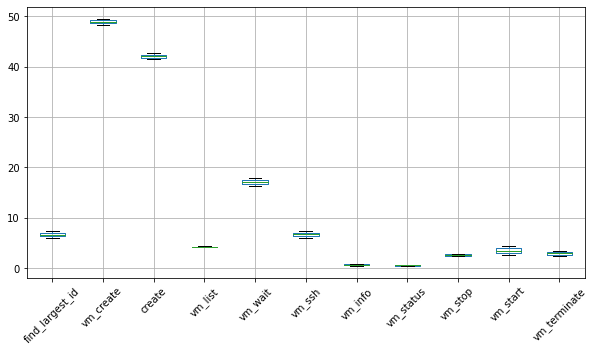

In [11]:

df.boxplot(figsize=(10,5))
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

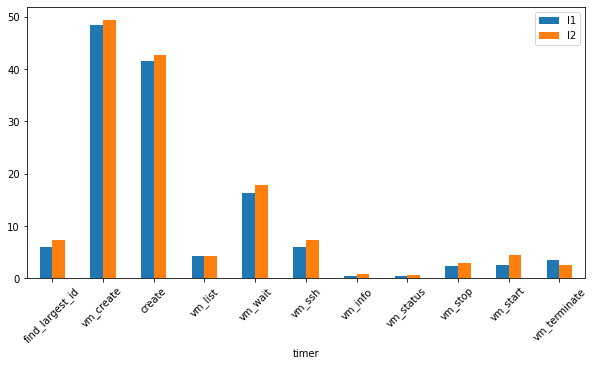

In [30]:
df = df.transpose()
df.plot.bar(figsize=(10,5))
plt.xticks(rotation=45)